# Neural networks
### Multi-layer perceptron

CSI4106 Artificial Intelligence  
Fall 2018  
Caroline Barrière

***

We are going into the medical domain for this notebook. The supervised classification task tackled in this notebook is about diabetes patient readmission in hospital, provided a certain set of features describing their physical state, as well as the procedure they went through during their stay, the medications they take, etc.

Any *readmitted patient* is very costly for a medical system. It shows to some extent, that the patient was discharged before having fully recovered.  The dataset we explore splits readmission into 3 values: before 30 days, after 30 days, and none.  Understanding what conditions brings patients back to the hospital within 30 days is very important for a medical system, as these cases should be minimized.

This notebook will allow you to pursue your understanding of experimental set-up for supervised machine learning, in particular supervised classification through the use of multi-layer perceptrons.

We will make use of two packages: (1) **scikit-learn**, a great machine learning package, which you've experimented with in the last notebook, and (2) **pandas**, a must-have for data science.  Make sure you have the LATEST version of scikit-learn (version 0.20), otherwise some functions (the one-hot-encoder) will not work.

As this is your 5th notebook this semester, some instructions will be a bit less explicit.

***

***HOMEWORK***:  
Go through the notebook by running each cell, one at a time. Look for (**TO DO**) for the tasks that you need to perform.  
Make sure you *sign* (type your name) the notebook at the end. Once you're done, submit your notebook.

***

**1. Obtaining the dataset**

First, read the description of the dataset on Diabetes Readmission (https://www.kaggle.com/brandao/diabetes/home).  The content of this site is also copied in the file Diabetes-DatasetDescription.ipynb, so you can have it locally.  

Download the dataset (file dataset_diabetes.zip) from the UCI archive:
https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008

Unzip the file *dataset_diabetes.zip* and there should be a file called *diabetic_data.csv* which we will use for our experiments.


**2. Exploring the dataset**  
We will use the package *pandas* to read the csv file.  It will create a data structure called a dataframe, which will contain all the data. 

If you get some errors when you import the packages, it's because they are not installed... make sure you do *pip install package_name* at the command prompt to have access to these packages.

In [1]:
# import the required packages for data analysis and machine learning

import pandas as pd
import sklearn

The following code reads the csv file (which I've put under a repertory called *Diabetes*, but you should adjust the path to where you've put it).  And then, it shows the top rows.

In [2]:
# Read the dataset, show top rows

X = pd.read_csv("Diabetes/diabetic_data.csv")
X.head(100)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [3]:
# Show all attributes
list(X)

['encounter_id',
 'patient_nbr',
 'race',
 'gender',
 'age',
 'weight',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'payer_code',
 'medical_specialty',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'diag_1',
 'diag_2',
 'diag_3',
 'number_diagnoses',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed',
 'readmitted']

In [4]:
# Examples of data exploration

print(X.shape)
print(X['race'].value_counts())

(101766, 50)
Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64


**(TO-DO - Q1)** Inspired by the little piece of code above, write code to answer the following questions.  You can do part of the process manually (the code needs to help you answer).

1. How many examples are in the dataset ?
2. How many features are in the dataset ?
3. What are the possible age ranges, and the number of examples in each ?
4. What are the prior probabilities of each class (>30, NO, <30) ?
5. Are there some patient present in the dataset more than 20 times?

In [5]:
### YOUR CODE -- Write which question it answers
# 1. How many examples are in the dataset ? 
length = X.shape[0]
print("Number of examples in dataset:")
print(length)
# 2. How many features are in the dataset ?
print("Number of features in dataset:")
print(X.shape[1])
# 3. What are the possible age ranges, and the number of examples in each?
print("Possible age ranges and number of examples in each:")
print(X['age'].value_counts())
# 4. What are the prior probabilities of each class (>30, NO, <30) ?
table = X['readmitted'].value_counts()
probg30=table['>30']/length*100
print("Probability of >30:")
print(probg30)

probNO=table['NO']/length*100
print("Probability of NO:")
print(probNO)

probl30=table['<30']/length*100
print("Probability of <30:")
print(probl30)
# 5. Are there some patient present in the dataset more than 20 times?
timetable=X['patient_nbr'].value_counts()
print(timetable[timetable>20])

Number of examples in dataset:
101766
Number of features in dataset:
50
Possible age ranges and number of examples in each:
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64
Probability of >30:
34.92816854352141
Probability of NO:
53.911915571015854
Probability of <30:
11.159915885462727
88785891    40
43140906    28
23199021    23
1660293     23
88227540    23
23643405    22
84428613    22
92709351    21
Name: patient_nbr, dtype: int64


**3.  Preparing the dataset for experimentation**

We will do different steps to prepare the data for experimentations:  (1) extracting the class we wish to predict, (2) splitting the dataset into a training and a test set

In [6]:
# This can ONLY BE DONE ONCE, as we pop the values into a new variable to be used as predicted class
y = X.pop("readmitted").values

In [7]:
# split the large dataset into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
print(X_train.shape)
print(y_test.shape)

(76324, 49)
(25442,)


**4. Input encoding**

We saw in class that any multi-value feature must be encoded into a one-hot vector.  The code below allows this encoding.

In [8]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

# encoder
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

# since the dataset is quite large, try a subset of features
featureSet = ['race','gender','age', 'weight', 'time_in_hospital', 'num_lab_procedures', 'num_procedures',
 'num_medications']

# make a copy of the training set containing only the chosen features
X_train_sf = X_train[featureSet].copy()
X_test_sf = X_test[featureSet].copy()

# IF you wanted to try with the full dataset, try to redo the steps with this (optional - takes a lot of time)
# X_train_allf = X_train[:].copy()
# X_test_allf = X_test[:].copy()

# perform the one-hot encoder on the 3 features selected
ohe.fit(X_train_sf)


OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float64'>, handle_unknown='ignore',
       n_values=None, sparse=False)

In [9]:
# The one-hot-encoder renames the features

feature_names = ohe.get_feature_names()
print(feature_names)

['x0_?' 'x0_AfricanAmerican' 'x0_Asian' 'x0_Caucasian' 'x0_Hispanic'
 'x0_Other' 'x1_Female' 'x1_Male' 'x1_Unknown/Invalid' 'x2_[0-10)'
 'x2_[10-20)' 'x2_[20-30)' 'x2_[30-40)' 'x2_[40-50)' 'x2_[50-60)'
 'x2_[60-70)' 'x2_[70-80)' 'x2_[80-90)' 'x2_[90-100)' 'x3_>200' 'x3_?'
 'x3_[0-25)' 'x3_[100-125)' 'x3_[125-150)' 'x3_[150-175)' 'x3_[175-200)'
 'x3_[25-50)' 'x3_[50-75)' 'x3_[75-100)' 'x4_1' 'x4_2' 'x4_3' 'x4_4'
 'x4_5' 'x4_6' 'x4_7' 'x4_8' 'x4_9' 'x4_10' 'x4_11' 'x4_12' 'x4_13'
 'x4_14' 'x5_1' 'x5_2' 'x5_3' 'x5_4' 'x5_5' 'x5_6' 'x5_7' 'x5_8' 'x5_9'
 'x5_10' 'x5_11' 'x5_12' 'x5_13' 'x5_14' 'x5_15' 'x5_16' 'x5_17' 'x5_18'
 'x5_19' 'x5_20' 'x5_21' 'x5_22' 'x5_23' 'x5_24' 'x5_25' 'x5_26' 'x5_27'
 'x5_28' 'x5_29' 'x5_30' 'x5_31' 'x5_32' 'x5_33' 'x5_34' 'x5_35' 'x5_36'
 'x5_37' 'x5_38' 'x5_39' 'x5_40' 'x5_41' 'x5_42' 'x5_43' 'x5_44' 'x5_45'
 'x5_46' 'x5_47' 'x5_48' 'x5_49' 'x5_50' 'x5_51' 'x5_52' 'x5_53' 'x5_54'
 'x5_55' 'x5_56' 'x5_57' 'x5_58' 'x5_59' 'x5_60' 'x5_61' 'x5_62' 'x5_63'
 'x5_64

In [10]:
# We can now encode the training and test set with the new features

X_train_sf_encoded = ohe.transform(X_train_sf)
X_test_sf_encoded = ohe.transform(X_test_sf)

**(TO-DO - Q2)** - How many features are there now, after the one-hot-encoder? Why so many? Show the shape of the training set now.

In [11]:
print("After the one hot encoder there are:")
print(str(len(feature_names))+ " features")
print("this is because the features are divided into subfeatures.")
print("i.e. race is divided into AfricanAmerican, Asians, etc.")
# We can see the shape of the training data
print(X_train_sf_encoded.shape)

After the one hot encoder there are:
240 features
this is because the features are divided into subfeatures.
i.e. race is divided into AfricanAmerican, Asians, etc.
(76324, 240)


**5. Train the Multi-layer Perceptron**

In [12]:
# Import the MLP model
from sklearn.neural_network import MLPClassifier
import datetime
import matplotlib.pyplot as plt

In [13]:
# Define the model
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(100, 2), random_state=1, max_iter=100, learning_rate_init=.01, warm_start=True)

print("##### Question 3 ####")
print("solver=lbfgs : for weight optimization, lbfgs is in the family of quasi-Newton methods\n")
print("alpha=1e-5 : regularization term parameter\n")
print("hidden_layer_sizes=(100,2) : the ith element represent the # of neurons in the ith hidden layer\n")
print("random_state=1 : 1 is the seed used by the random # generator\n")
print("max_iter=100 : max iterations is 100\n")
print("learning_rate_init=.01 : .01 is the initial learning rate used\n")
print("warm_start=True = reuses the solution the of previous call as initialization\n")
print("The 'score' used below returns the mean accuracy on the given test data and labels")

##### Question 3 ####
solver=lbfgs : for weight optimization, lbfgs is in the family of quasi-Newton methods

alpha=1e-5 : regularization term parameter

hidden_layer_sizes=(100,2) : the ith element represent the # of neurons in the ith hidden layer

random_state=1 : 1 is the seed used by the random # generator

max_iter=100 : max iterations is 100

learning_rate_init=.01 : .01 is the initial learning rate used

warm_start=True = reuses the solution the of previous call as initialization

The 'score' used below returns the mean accuracy on the given test data and labels


**(TO-DO - Q3)** - Explain the parameters chosen above, and explain what the "score" is (used below).  You will need to look into the documentation for MLPclassifier to understand the score.

In [14]:
# This steps trains the model
# ATTENTION - THIS CAN TAKE LONG IF YOU CHOSE MANY ITERATIONS AND/OR LARGE HIDDEN LAYERS
# Each iteration, on my machine, takes about 80 seconds.  Be patient.
scores_train = []
for i in range(1,10):
    print("Iteration: " + str(i) + "-- " + str(datetime.datetime.now()))
    clf.fit(X_train_sf_encoded, y_train)
    score = clf.score(X_train_sf_encoded, y_train)
    scores_train.append(score)
print(scores_train)

Iteration: 1-- 2018-12-05 17:15:04.225883
Iteration: 2-- 2018-12-05 17:15:25.992173
Iteration: 3-- 2018-12-05 17:15:47.290988
Iteration: 4-- 2018-12-05 17:16:07.855957
Iteration: 5-- 2018-12-05 17:16:29.331273
Iteration: 6-- 2018-12-05 17:16:50.312593
Iteration: 7-- 2018-12-05 17:17:10.935773
Iteration: 8-- 2018-12-05 17:17:31.500781
Iteration: 9-- 2018-12-05 17:17:53.804590
[0.5697159478014779, 0.610738430899848, 0.6299984277553587, 0.6411744667470258, 0.6497300980032493, 0.6551543420156176, 0.6585346679943399, 0.6609978512656569, 0.6628190346417903]


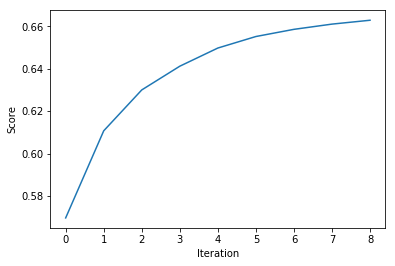

In [15]:
# plot the scores
plt.plot([i for i in range(len(scores_train))], scores_train)
plt.ylabel('Score')
plt.xlabel('Iteration')
plt.show()

**(TO-DO : Q4)** Describe what the code below shows.

In [16]:
#* Question 4 *
#The code below predicts the first 10 examples and then looks at the first
#10 training examples. Then it prints the probability of each option.  For
#example, the first row shows that theres a 17% chance it is <30, a 54% 
#chance it is >30 and a 27% chance it is NO, so >30 is predicted.

In [17]:
# Show the prediction on the first 10 examples
y_predicted = clf.predict(X_train_sf_encoded[0:10])
print(y_predicted)
print(y_train[0:10])
clf.predict_proba(X_train_sf_encoded[0:10])

['NO' 'NO' 'NO' 'NO' 'NO' 'NO' '>30' 'NO' '>30' '>30']
['NO' 'NO' '>30' 'NO' 'NO' 'NO' '>30' 'NO' '>30' '>30']


array([[0.0014496 , 0.00421508, 0.99433532],
       [0.04049198, 0.12466927, 0.83483874],
       [0.07171929, 0.22349987, 0.70478083],
       [0.02680499, 0.08188779, 0.89130722],
       [0.01090751, 0.03279888, 0.95629361],
       [0.05130479, 0.15871456, 0.78998065],
       [0.18286356, 0.50852734, 0.3086091 ],
       [0.06632886, 0.20633213, 0.72733901],
       [0.1637615 , 0.52417549, 0.31206302],
       [0.1637615 , 0.52417549, 0.31206302]])

**5. Test the Multi-layer Perceptron**

**(TO-DO - Q5)** Now that we've trained the model, evaluate on the test set.  What is the score?  How is it compared to the score on the training set?

In [18]:
# The average score of the training set is 64 and the final score of the 
# test set is 65, therefore the test set is slightly better than the training
# set. However, these numbers could be a bit different for each run.

In [19]:
# The test set is encoded in here: X_test_sf_encoded
clf.fit(X_test_sf_encoded, y_test)
scores_test = clf.score(X_test_sf_encoded, y_test)

print(scores_test)

0.5449650184733904


**6. Varying hyperparameters**

There are many hyperparameters that can be varied (number of hidden layers, learning rate, etc).  It takes time to do these variations... we'll perform just two variations.

**(TO-DO - Q6)** - Redo the experiment above (train + test), changing the number and size of hidden layers to have three layers of 30 units each.  DO NOT CHANGE the code above directly, copy the part of the code needed below, using other variable names (this will allow to run the full notebook in a linear manner).  Compare the results with the first experiment, is it better? worst? Then keep the best model, and change the activation function to the sigmoid.  Better or worst?

Iteration: 1-- 2018-12-05 17:18:24.747360
Iteration: 2-- 2018-12-05 17:18:41.617506
Iteration: 3-- 2018-12-05 17:18:57.280392
Iteration: 4-- 2018-12-05 17:19:12.618966
Iteration: 5-- 2018-12-05 17:19:28.036970
Iteration: 6-- 2018-12-05 17:19:43.565229
Iteration: 7-- 2018-12-05 17:19:58.795086
Iteration: 8-- 2018-12-05 17:20:12.362060
Iteration: 9-- 2018-12-05 17:20:23.503973
[0.5580944394947854, 0.5726901105812064, 0.5823070069702846, 0.5906268015303181, 0.594583617210838, 0.5963523924322625, 0.5983963104659085, 0.5992348409412505, 0.6004402284995546]


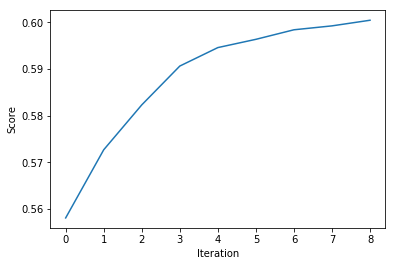

0.5929958336608757
Iteration: 1-- 2018-12-05 17:20:38.693425
Iteration: 2-- 2018-12-05 17:20:58.302942
Iteration: 3-- 2018-12-05 17:21:17.545829
Iteration: 4-- 2018-12-05 17:21:36.715068
Iteration: 5-- 2018-12-05 17:21:55.962086
Iteration: 6-- 2018-12-05 17:22:15.441993
Iteration: 7-- 2018-12-05 17:22:34.619289
Iteration: 8-- 2018-12-05 17:22:53.786536
Iteration: 9-- 2018-12-05 17:23:12.972953
[0.545464074209947, 0.5480582778680363, 0.5505476652167077, 0.5547141135160631, 0.5600859493737226, 0.5634269692364132, 0.5663487238614329, 0.5725852942717887, 0.575847701902416]


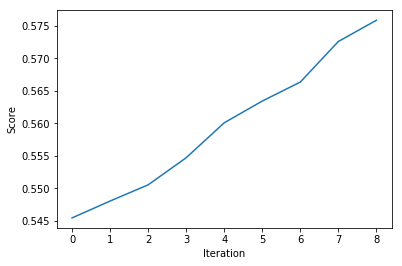

0.5730681550192595


In [20]:
# Define the model
clf2 = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(30, 30, 30), random_state=1, max_iter=100, learning_rate_init=.01, warm_start=True)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size = 0.25)
X_train_sf2 = X_train2[featureSet].copy()
X_test_sf2 = X_test2[featureSet].copy()
X_train_sf_encoded2 = ohe.transform(X_train_sf2)
X_test_sf_encoded2 = ohe.transform(X_test_sf2)
scores_train2 = []
for i in range(1,10):
    print("Iteration: " + str(i) + "-- " + str(datetime.datetime.now()))
    clf2.fit(X_train_sf_encoded2, y_train2)
    score2 = clf2.score(X_train_sf_encoded2, y_train2)
    scores_train2.append(score2)
print(scores_train2)

plt.plot([i for i in range(len(scores_train2))], scores_train2)
plt.ylabel('Score')
plt.xlabel('Iteration')
plt.show()

clf2.fit(X_test_sf_encoded2, y_test2)
scores_test2 = clf2.score(X_test_sf_encoded2, y_test2)
print(scores_test2)

# It appears the first experiment had better results so I will use that model
# using sigmoid activation function
clf3 = MLPClassifier(activation='logistic',solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(100, 2), random_state=1, max_iter=100, learning_rate_init=.01, warm_start=True)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size = 0.25)
X_train_sf3 = X_train3[featureSet].copy()
X_test_sf3= X_test3[featureSet].copy()
X_train_sf_encoded3 = ohe.transform(X_train_sf3)
X_test_sf_encoded3 = ohe.transform(X_test_sf3)
scores_train3 = []
for i in range(1,10):
    print("Iteration: " + str(i) + "-- " + str(datetime.datetime.now()))
    clf3.fit(X_train_sf_encoded3, y_train3)
    score3 = clf3.score(X_train_sf_encoded3, y_train3)
    scores_train3.append(score3)
print(scores_train3)

plt.plot([i for i in range(len(scores_train3))], scores_train3)
plt.ylabel('Score')
plt.xlabel('Iteration')
plt.show()

clf3.fit(X_test_sf_encoded3, y_test3)
scores_test3 = clf3.score(X_test_sf_encoded3, y_test3)
print(scores_test3)

**(TO_DO - Q7 - Optional)** -- Compare the results with the logistic regression classifier available in sklearn.

In [21]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
# ....

#### Signature

I, Reyna Doerwald, declare that the answers provided in this notebook are my own.